# Naive Bayes 朴素贝叶斯算法
> 该文章作为机器学习的第二篇文章，主要介绍的是朴素贝叶斯算法的原理和应用。学习本章内容建议对概率论中的联合概率以及先验概率、后验概率有初步的学习和掌握。
>
> 难度系数：⭐⭐⭐
>
> 更多相关工作请参考：[Github](https://github.com/swx3027925806/MachineLearning)

## 算法介绍

朴素贝叶斯算法是一种**基于概率论的分类算法** ，它假设特征之间是独立的，即特征之间没有关联关系。朴素贝叶斯算法通过计算每个类别的概率来对新的样本进行分类。

### 算法原理解析

#### 贝叶斯定理

贝叶斯定理是概率论中的核心概念，用于描述当存在新的信息或数据时，如何更新对某一事件或参数的信念。具体来说，它提供了从条件概率和先验概率推导出后验概率的公式。

贝叶斯定理的公式为：$P(A|B) = (P(B|A) * P(A)) / P(B)$。这个公式用于计算在给定事件B发生的情况下，事件A发生的概率，即后验概率。

其中:
- $P(A|B)$: 这是我们要求的后验概率，即在事件B已经发生的情况下，事件A发生的概率。
- $P(B|A)$: 这是条件概率，表示在事件A发生的情况下，事件B发生的概率。
- $P(A)$: 这是事件A的先验概率，即在没有任何额外信息的情况下，事件A发生的概率。
- $P(B)$: 这是事件B的先验概率，即在没有任何额外信息的情况下，事件B发生的概率。

贝叶斯定理的公式用于计算后验概率，即根据新的证据或数据，更新对事件A发生的信念。通过使用先验概率和条件概率，贝叶斯定理可以帮助我们在给定新信息的情况下，更准确地估计事件A发生的概率。

接下来是笔者的一些公式推导，在事件相互独立的情况下：

在B事件发生的情况下，A事件发生的概率为：

$$
P(A|B) = P(A \cap B) / P(B)
$$

在A事件发生的情况下，B事件发生的概率为：

$$
P(B|A) = P(A \cap B) / P(A)
$$

通过$P(A \cap B)$作为桥梁，化简公式，我们便得到的公式：

$$
P(A|B) = (P(B|A) * P(A)) / P(B)
$$

#### 传统版本

朴素贝叶斯算法是一种基于贝叶斯定理与特征条件独立假设的分类方法。这种算法有坚实的数学基础，分类效率相对稳定。从数学角度看，朴素贝叶斯算法主要应用了贝叶斯定理。

朴素贝叶斯算法利用了贝叶斯定理来计算样本属于某个类别的概率。具体来说，对于一个样本$x$，假设它属于类别$c$的概率$P(c|x)$可以由以下公式计算：
$$
P(c|x) = P(c) * P(x|c) / P(x)
$$
其中$P(c)$是类别$c$的先验概率，即该类别在训练集中的比例；$P(x|c)$是在类别$c$的条件下$x$出现的概率；$P(x)$是$x$在训练集中的总概率。

朴素贝叶斯算法的核心思想是假设特征之间相互独立，即$P(x|c)$可以分解为各个特征的条件概率的乘积。具体来说，如果$x$是一个$n$维特征向量，即$x=(x1,x2,...,xn)$，那么$P(x|c)$可以表示为：
$$
P(x|c) = P(x1|c) * P(x2|c) * ... * P(xn|c)
$$
其中$P(xi|c)$是在类别$c$的条件下特征$xi$出现的概率。

#### 故事版本

首先，朴素贝叶斯算法是一种基于贝叶斯定理的分类方法。贝叶斯定理是用来计算某个事件发生的概率，基于这个事件已经发生和还没有发生的概率。

为了让你更好地理解，让我们用生活中的一个例子来说明：

假设你有一个朋友，他是个图书管理员。他可以根据一本书的封面来判断这本书是否是儿童书。怎么做到的呢？

1. 属性选择：他首先会看书的几个关键特征，例如书的颜色、封面的图案和标题等。这些都是他判断的“属性”。
2. 概率计算：基于他的经验，他知道某种颜色或图案更有可能出现在儿童书中。这就是他基于这些属性计算出的不同类型书籍的概率。
3. 分类决策：当一本书放在他面前时，他会根据这些属性（颜色、图案等）来判断这本书是否是儿童书。

这就是朴素贝叶斯算法的核心思想：基于已知属性来预测或分类一个事件或对象。

但为什么叫“朴素”呢？因为这种方法有一个前提假设，那就是每个属性之间是**相互独立**的。这意味着书的不同属性（例如颜色和图案）不会相互影响，也就是说，一个书不会因为它是红色且有一个星星图案就更有可能是儿童书，如果这两个特征在之前的样本中没有同时出现过，这个假设就不成立。但为了简化计算，我们通常会做这个假设。

### 数学原理

#### 基于离散特征的朴素贝叶斯算法

我们要从数学角度推导如何在具备$N$个特征的数据集上，通过朴素贝叶斯实现分类。

首先，我们需要了解几个关键概念：

特征：数据集中的每个独立变量。
类别：数据集中的目标变量或分类。
概率：某一事件发生的可能性。
朴素贝叶斯：基于贝叶斯定理和特征独立假设的分类方法。
现在，我们开始推导：

第一步，设数据集有$N$个特征，记作 $(X_1, X_2, ..., X_N)$。

第二步，设目标类别有M种，记作 $(C_1, C_2, ..., C_M)$。

第三步，基于贝叶斯定理，对于给定的类别 $(C_k)$，一个样本 $(X)$ 属于 $(C_k)$ 的概率可以表示为：
$$
P(C_k | X_1, X_2, ..., X_N) = \frac{P(C_k) \times P(X_1 | C_k) \times P(X_2 | C_k) \times ... \times P(X_N | C_k)}{P(X_1) \times P(X_2) \times ... \times P(X_N)}
$$
其中，$P(C_k)$ 是类别 $C_k$ 的先验概率，$P(X_i | C_k)$ 是特征 $(X_i)$ 在类别 $(C_k)$ 下的条件概率。

第四步，由于我们假设特征之间是独立的，所以：
$$
P(X | C) = P(X_1 | C) \times P(X_2 | C) \times ... \times P(X_N | C)
$$
$$
P(X) = P(X_1) \times P(X_2) \times ... \times P(X_N)
$$

第五步，将第四步的结论代入第三步的公式，得到：
$$
P(C_k | X) = \frac{P(C_k) \times P(X | C_k)}{P(C_1) \times P(X | C_1) + P(C_2) \times P(X | C_2) + ... + P(C_M) \times P(X | C_M)}
$$
第六步，由于我们通常无法得知真实的概率值，因此需要使用已知的训练数据集来估计这些概率。具体来说，对于类别 $(C_k)$ 和特征 $(X_i)$，我们有：
$$
P(C_k) = \frac{\text{样本中属于} C_k \text{的样本数}}{\text{总样本数}}
$$
$$
P(X_i | C_k) = \frac{\text{属于} C_k \text{且具有} X_i \text{的样本数}}{\text{属于} C_k \text{的样本数}}
$$
第七步，最后，为了得到每个类别被选中的概率，我们将每个类别的概率除以所有类别的概率之和。即：
$$
P(C_k | X) = \frac{P(C_k)}{P(C_1) + P(C_2) + ... + P(C_M)} \times P(X | C_k)
$$
这就是朴素贝叶斯分类器的数学推导过程。通过这个过程，我们可以使用已知的训练数据集来估计每个类别的概率和每个特征在每个类别下的条件概率，然后使用这些估计值来预测新的未知样本的类别。

#### 基于连续特征的朴素贝叶斯算法

对于连续特征，朴素贝叶斯分类器可以采用两种方式进行处理。第一种方法是将连续的数据离散化，然后用相应的离散区间替换连续数值。然而，这种方法对于划分离散区间的粒度要求较高，不能太细，也不能太粗。

第二种方法是假设连续数据服从某个概率分布，使用训练数据估计分布参数。通常我们用高斯分布（正态分布）来表示连续数据的类条件概率分布。具体来说，我们可以计算每个特征在每个类别中的均值和标准差，然后使用这些参数来评估给定特征值在该类别中的概率。这种方法在计算后验概率时更加准确。

如果数据是连续的并且特征之间存在顺序关系（例如身高、体重、脚掌长度等），可以假设这些特征服从正态分布，并通过计算训练样本中各个类别中此特征的均值和标准差来得到正态分布的密度函数。然后使用该密度函数来评估给定特征值的概率。

## 数据集介绍

鸢尾花(Iris)数据集是一个常用的分类实验数据集，由Fisher在1936年收集整理。该数据集包含150个样本，每个样本有四个属性：花萼长度、花萼宽度、花瓣长度和花瓣宽度，这四个属性用于预测鸢尾花属于Setosa、Versicolour或Virginica三个种类中的哪一类。

鸢尾花数据集的特点是具有多重变量，即每个样本都有多个特征，这使得它成为进行多元分类任务的一个理想选择。通过分析这些特征，可以了解不同鸢尾花品种之间的差异，并建立分类器来自动识别未知样本的种类。

鸢尾花数据集的来源是实际的鸢尾花测量数据，因此它具有实际背景和应用价值。这个数据集经常被用于机器学习和数据挖掘算法的实验和验证，因为它提供了多变量分析的一种有效方式。

在本次朴素贝叶斯分类中，我们计划采用这个数据集作为我们的实验对象。


## 代码实现


In [1]:
# 准备好我们需要使用的第三方包
import os
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

### 数据分析

首先，我们加载数据集，并展示一下数据的格式：

In [2]:
column_names=['SepalLength','SepalWidth','PetalLength', 'PetalWidth','Species']
train_dataset = pd.read_csv('dataset\\iris_training.csv', header=0, names=column_names)
test_dataset = pd.read_csv('dataset\\iris_test.csv', header=0, names=column_names)
train_dataset.info()
train_dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  120 non-null    float64
 1   SepalWidth   120 non-null    float64
 2   PetalLength  120 non-null    float64
 3   PetalWidth   120 non-null    float64
 4   Species      120 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.8 KB


,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


接下来，我们可以对每个维度的特征进行统计分析，例如计算每个维度的均值、标准差、最大值、最小值等。并通过作图的方式来展示特征与类别之间的关系：

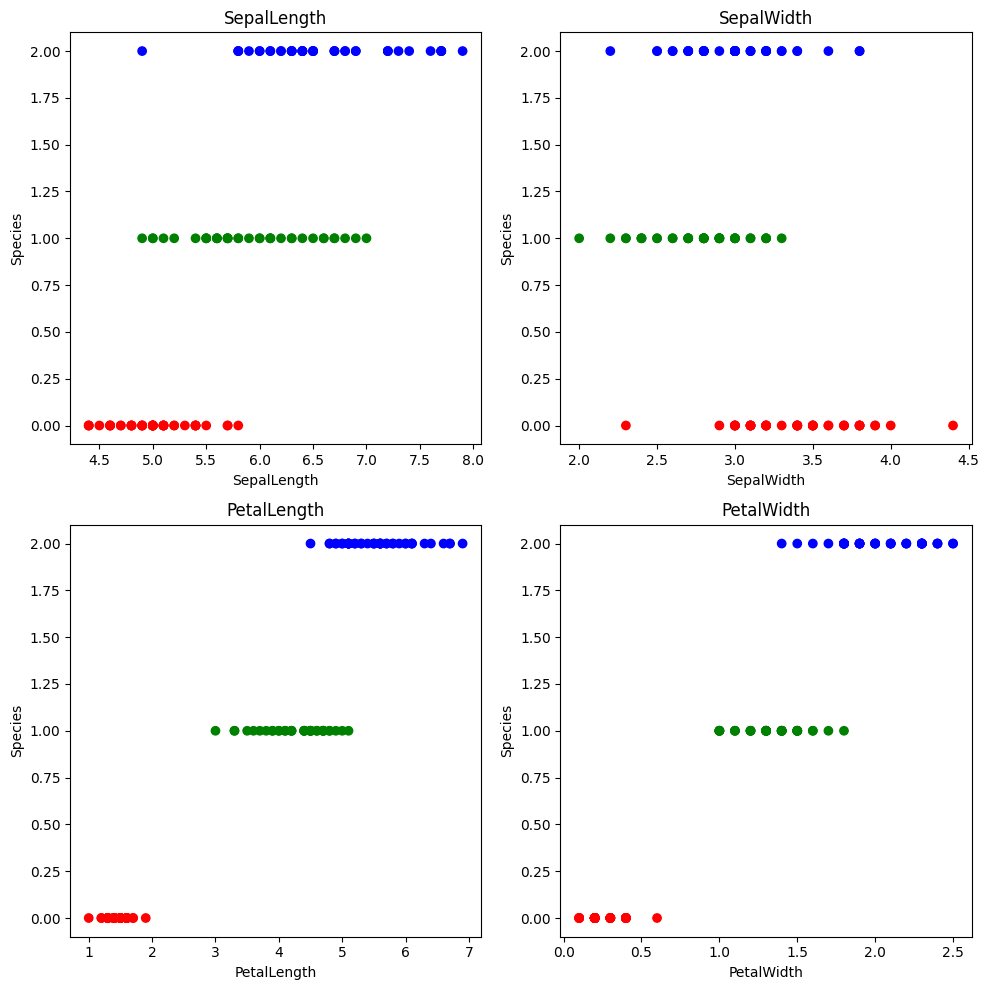

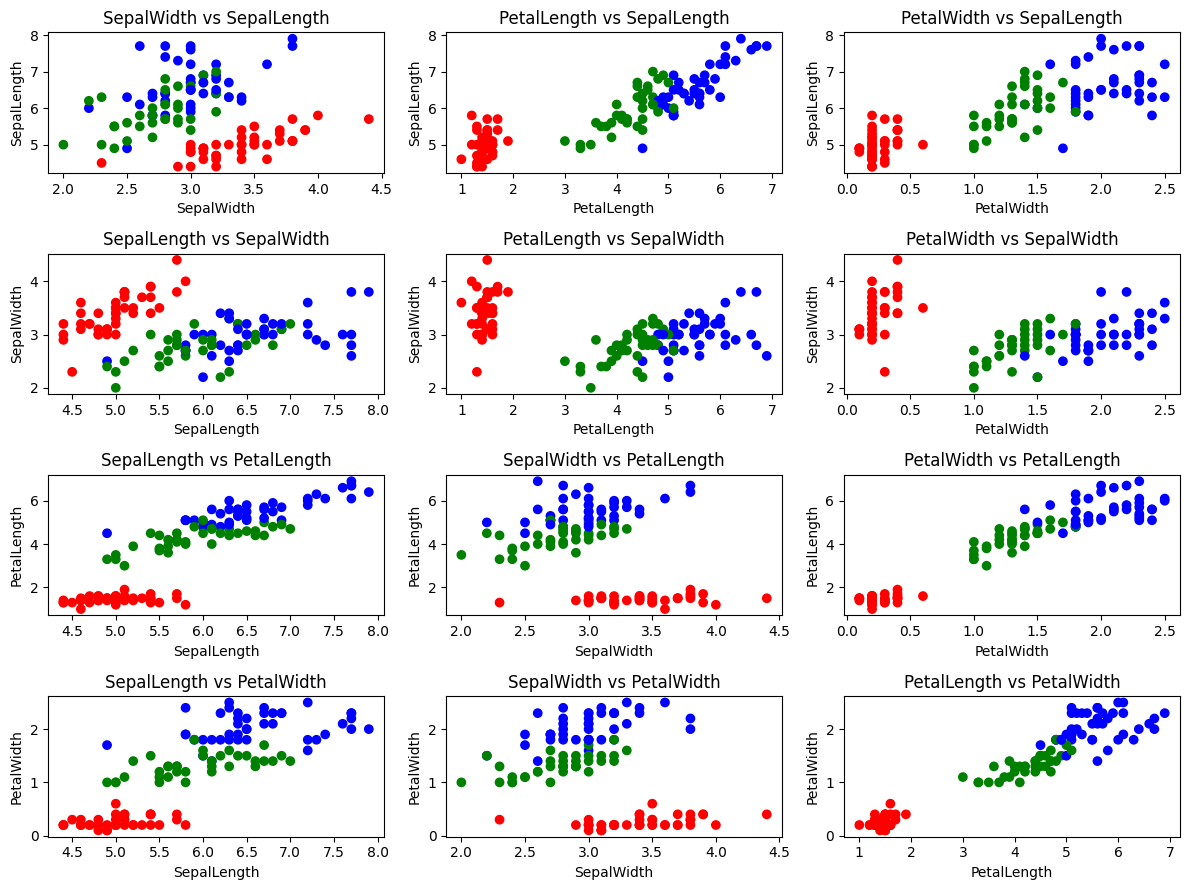

[ SepalLength] mean:5.84500 std:0.86858 max:7.90000 min:4.40000
[  SepalWidth] mean:3.06500 std:0.42716 max:4.40000 min:2.00000
[ PetalLength] mean:3.73917 std:1.82210 max:6.90000 min:1.00000
[  PetalWidth] mean:1.19667 std:0.78204 max:2.50000 min:0.10000


In [3]:
def feature_analysis(X, Y):
    """输入特征X与类别标签Y，分析特征的均值、标准差、最大值、最小值，
    并绘制散点图来表示每个维度特征与类别之间的关系存在四个特征，
    故制作一个画布，绘制一张2x2的子图来展示每个特征

    Args:
        X (pd.DataFrame): 输入的特征数据
        Y (pd.DataFrame): 特征对应的标签
    """
    # 设置颜色及子图的大小
    color = ListedColormap(['red', 'green', 'blue'])
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
    data_info = {}
    # 遍历每个特征
    for i, feature in enumerate(X.columns):
        data_info[feature] = {
            "mean": X[feature].mean(),
            "std": X[feature].std(),
            "min": X[feature].min(),
            "max": X[feature].max()
        }
        # 绘制散点图来表示每个维度特征与类别之间的关系存在四个特征
        axes[i // 2, i % 2].scatter(X[feature], Y, c=Y, cmap=color)
        axes[i // 2, i % 2].set_title(feature)
        axes[i // 2, i % 2].set_xlabel(feature)
        axes[i // 2, i % 2].set_ylabel('Species')
    plt.tight_layout()
    plt.show()

    # 绘制两两特征之间的散点图
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 9))
    for i, feature_x in enumerate(X.columns):
        for j, feature_y in enumerate(X.columns):
            if i != j:
                y = i if i < j else i-1
                axes[j, y].scatter(X[feature_x], X[feature_y], c=Y, cmap=color)
                axes[j, y].set_title(feature_x + ' vs ' + feature_y)
                axes[j, y].set_xlabel(feature_x)
                axes[j, y].set_ylabel(feature_y)
    plt.tight_layout()
    plt.show()


    for key, value in data_info.items():
        print("[%12s] mean:%7.5f std:%7.5f max:%7.5f min:%7.5f" % (key, value['mean'], value['std'], value['max'], value['min']))
    

feature_analysis(train_dataset.iloc[:, :-1], train_dataset.iloc[:, -1])



从展示的图像中我们可以看到不同特征与类别之间的关系。也可以看出两两特征在组合后所呈现的特征关系，这些都与我们后续的朴素贝叶斯算法有关系。

### 构建朴素贝叶斯算法

我们将继续从自己构建和调用sklearn两种模式来为大家呈现这个算法的实现。

#### 基础实现

朴素贝叶斯算法在自我实现的时候需要考虑到，我们在构建NaiveBayes模型的时候，需要考虑到有以下的功能：

2. 算法的训练
3. 算法的预测
4. 算法的评估

接下来，我们开始构建属于我们自己的朴素贝叶斯算法：

In [4]:
class NaiveBayes:
    def __init__(self):
        self.class_prob = None
        self.class_cond_prob = None
        self.discretization = None
        self.n_classes = None

    # 该函数将输入某一个维度的连续特征，将返回服从高斯分布的特征参数
    def gaussian_process(self, feature):
        # feature是pd.DataFrame
        mean = feature.mean()
        std = feature.std()
        return mean, std
    
    # 该函数将输入某一个维度的连续特征，将返回划分区域的area个区域，同时需要考虑到在feature分布外的数据[-inf, inf]
    def zoning_process(self, feature, area=5):
        # feature是pd.DataFrame
        min_value = feature.min() - 0.01
        max_value = feature.max() + 0.01
        step = (max_value - min_value) / (area - 2)
        # 划分区域
        zones = []
        for i in range(area):
            if i == 0:
                zones.append([float("-inf"), min_value])
            elif i == area-1:
                zones.append([max_value, float("inf")])
            else:
                zones.append([min_value + (i-1) * step, min_value + i * step])
        return zones

    # 模型的训练
    def fit(self, X, Y, discretization=False, area=0):
        # X是pd.DataFrame，Y是pd.Series
        self.discretization = discretization
        # 计算class_prob
        self.class_prob = Y.value_counts(normalize=True).to_dict()
        self.n_classes = len(self.class_prob.keys())

        # 计算class_mean
        self.class_cond_prob = {}
        for i in self.class_prob.keys():
            self.class_cond_prob[i] = {}
            for j, feature_name in enumerate(X.columns):
                if discretization and X[feature_name].dtype == "float64":
                    # 通过self.zoning的方法，将特征转换成离散的片段
                    # self.zoning的返回是Nx2的列表，代表区间的最小值和最大值
                    zones = self.zoning_process(X[feature_name], area)
                    self.class_cond_prob[i][feature_name] = {"type": "zoning", "zoning": {}}
                    for k, zone in enumerate(zones):
                        zone = tuple(zone)
                        self.class_cond_prob[i][feature_name]["zoning"][zone] = 0
                        # 筛选出Y中符合i的下标以及对应的X中的特征
                        index = (Y == i) & (X[feature_name] >= zone[0]) & (X[feature_name] < zone[1])
                        self.class_cond_prob[i][feature_name]["zoning"][zone] = X[feature_name][index].shape[0] / (Y == i).sum()
                elif not discretization and X[feature_name].dtype == "float64":
                    # 通过self.gaussian_process函数获得特征的均值和方法，获得高斯分布的特性
                    index = (Y == i)
                    mean, std = self.gaussian_process(X[feature_name][index])
                    self.class_cond_prob[i][feature_name] = {"type": "gaussian", "mean": mean, "std": std}
                else:
                    # 特征本身就是离散的
                    self.class_cond_prob[i][feature_name] = {"type": "discrete"}
                    for value in X[feature_name].unique():
                        self.class_cond_prob[i][feature_name][value] = 0
                        index = (Y == i) & (X[feature_name] == value)
                        self.class_cond_prob[i][feature_name][value] = X[feature_name][index].shape[0] / (Y == i).sum()

    def predict(self, X):
        # 通过朴素贝叶斯的方法预测结果
        # X是pd.DataFrame
        prediction = []
        for i in range(X.shape[0]):
            prob = np.ones(self.n_classes)
            for j in range(self.n_classes):
                for feature_name in X.columns:
                    if feature_name not in self.class_cond_prob[j]:
                        continue
                    if self.class_cond_prob[j][feature_name]["type"] == "discrete":
                        prob[j] *= self.class_cond_prob[j][feature_name][X.iloc[i, :][feature_name]]
                    elif self.class_cond_prob[j][feature_name]["type"] == "zoning":
                        for area, sub_prob in self.class_cond_prob[j][feature_name]["zoning"].items():
                            if X.iloc[i, :][feature_name] >= area[0] and X.iloc[i, :][feature_name] < area[1]:
                                prob[j] *= sub_prob
                    elif self.class_cond_prob[j][feature_name]["type"] == "gaussian":
                        mean = self.class_cond_prob[j][feature_name]["mean"]
                        std = self.class_cond_prob[j][feature_name]["std"]
                        prob[j] *= norm.pdf(X.iloc[i, :][feature_name], mean, std)
            prediction.append(np.argmax(prob))
        return pd.DataFrame(prediction)
    
    def score(self, pred, target):
        assert len(pred) == len(target), "The length of predictions and targets must be equal."
        # 计算pred 和 target 中相同元素的个数
        return (pred == target).sum() / len(pred)



以上是我们复现的朴素贝叶斯算法的代码，对于特征，我们提供了三种模式，其中对于离散特征，我们仅需要
将其映射到对应的类别即可；对于连续特征，我们提供了两种模式分别是`gaussian_process`和`zoning_process`；
1. 对于`zoning_process`，我们将连续特征划分为不同的区间，然后在每个区间内使用不同的概率分布来建模。
2. 对于`gaussian_process`，我们使用高斯分布来建模模拟概率分布。

以下是我们调用自己实现的朴素贝叶斯方法的流程：

In [5]:
naivebayes = NaiveBayes()
train_X, train_Y = train_dataset.iloc[:, :-1], train_dataset.iloc[:, -1]

# 采用zoning_process，划分5区间的朴素贝叶斯
naivebayes.fit(train_X, train_Y, discretization=True, area=4)
pred = naivebayes.predict(test_dataset.iloc[:, :-1])
score = naivebayes.score(pred.iloc[:, 0], test_dataset.iloc[:, -1])

print("zoning_process area:4 acc:", score)

# 采用zoning_process，划分5区间的朴素贝叶斯
naivebayes.fit(train_X, train_Y, discretization=True, area=8)
pred = naivebayes.predict(test_dataset.iloc[:, :-1])
score = naivebayes.score(pred.iloc[:, 0], test_dataset.iloc[:, -1])

print("zoning_process area:8 acc:", score)

# 采用zoning_process，划分5区间的朴素贝叶斯
naivebayes.fit(train_X, train_Y, discretization=True, area=12)
pred = naivebayes.predict(test_dataset.iloc[:, :-1])
score = naivebayes.score(pred.iloc[:, 0], test_dataset.iloc[:, -1])

print("zoning_process area:12 acc:", score)

# 采用gaussian_process方法处理
naivebayes.fit(train_X, train_Y, discretization=False)
pred = naivebayes.predict(test_dataset.iloc[:, :-1])
score = naivebayes.score(pred.iloc[:, 0], test_dataset.iloc[:, -1])

print("gaussian_process acc:", score)

zoning_process area:4 acc: 0.7
zoning_process area:8 acc: 1.0
zoning_process area:12 acc: 0.9
gaussian_process acc: 0.9666666666666667


由实验结果可知，并不是说划分区间的越多，分类的准确率越高。在采用划分区域方法的时候选择合适的区域数，比如在划分5区间的朴素贝叶斯中，选择8个区域数，分类的准确率最高。同时，在采用高斯分布方法处理数据的时候，分类的准确率会较高，但也不一定完全优于划分区域的方法。

#### sklearn调用朴素贝叶斯

接下来我们演示一下朴素贝叶斯在sklearn中的使用。

In [6]:
from sklearn.naive_bayes  import GaussianNB
clf = GaussianNB()
clf.fit(train_X, train_Y)
pred = clf.predict(test_dataset.iloc[:, :-1])
score = clf.score(test_dataset.iloc[:, :-1], test_dataset.iloc[:, -1])
print("Accuracy:", score)

Accuracy: 0.9666666666666667


需要注意的是，朴素贝叶斯的算法强调了每个特征之间是相互独立的，但**现实中，特征之间可能存在一定的关联关系**。故在使用时需要注意。

## 高阶实验

最后我们这里提供了一个全新的数据集`Mobile_phone_price_range_estimate`;相较于之前的数据集，这个数据集的属性更多，并且属性之间存在一定的关联关系。该数据集主要作用是用来对比朴素贝叶斯和其他算法的性能的，为大家对算法侧重有一定的理解。


In [7]:
train_dataset = pd.read_csv('dataset\\Mobile_phone_price_range_estimate_train.csv')
test_dataset = pd.read_csv('dataset\\Mobile_phone_price_range_estimate_test.csv')

naivebayes = NaiveBayes()

train_X, train_Y = train_dataset.iloc[:, 1:-1], train_dataset.iloc[:, -1]
# 采用zoning_process，划分5区间的朴素贝叶斯
naivebayes.fit(train_X, train_Y, discretization=True, area=4)
pred = naivebayes.predict(test_dataset.iloc[:, 1:-1])
score = naivebayes.score(pred.iloc[:, 0], test_dataset.iloc[:, -1])

print("zoning_process area:4 acc:", score)

# 采用zoning_process，划分8区间的朴素贝叶斯
naivebayes.fit(train_X, train_Y, discretization=True, area=8)
pred = naivebayes.predict(test_dataset.iloc[:, 1:-1])
score = naivebayes.score(pred.iloc[:, 0], test_dataset.iloc[:, -1])

print("zoning_process area:8 acc:", score)


# 采用zoning_process，划分12区间的朴素贝叶斯
naivebayes.fit(train_X, train_Y, discretization=True, area=12)
pred = naivebayes.predict(test_dataset.iloc[:, 1:-1])
score = naivebayes.score(pred.iloc[:, 0], test_dataset.iloc[:, -1])

print("zoning_process area:12 acc:", score)

# 采用gaussian_process方法处理
naivebayes.fit(train_X, train_Y, discretization=False)
pred = naivebayes.predict(test_dataset.iloc[:, 1:-1])
score = naivebayes.score(pred.iloc[:, 0], test_dataset.iloc[:, -1])

print("gaussian_process acc:", score)

zoning_process area:4 acc: 0.5375
zoning_process area:8 acc: 0.7275
zoning_process area:12 acc: 0.715
gaussian_process acc: 0.7725


## 总结
朴素贝叶斯算法是一种基于贝叶斯定理的分类方法，其核心思想是利用已知的一组条件独立假设，将复杂的联合概率分布简化，从而更高效地进行分类。该算法在许多领域都有广泛的应用，如文本分类、垃圾邮件过滤、情感分析等。

朴素贝叶斯算法的主要优点包括：

1. **简单易理解：** 朴素贝叶斯算法基于贝叶斯定理，因此其原理相对简单，容易理解。
2. **高效：** 由于该算法使用了条件独立假设，因此在计算概率时可以大大减少计算量，特别是当特征数量很大时，其效率更高。
3. **对缺失值不敏感：** 由于使用了条件独立假设，朴素贝叶斯算法对特征之间的相关性要求不高，因此对缺失值不敏感。
4. **可扩展性强：** 对于大量数据集，朴素贝叶斯算法可以很容易地进行扩展和改进。

然而，朴素贝叶斯算法也存在一些局限性：

1. **对特征独立性假设的限制：** 朴素贝叶斯算法的核心在于假设特征之间是独立的，但在实际应用中，这个假设往往不成立。这可能导致算法的性能受到限制。
2. **对参数的依赖性：** 朴素贝叶斯算法的性能高度依赖于参数的选择，如平滑参数的选择等。选择合适的参数值对于获得最佳分类效果至关重要。
3. **对连续型特征的处理能力有限：** 对于连续型特征，朴素贝叶斯算法通常采用离散化或分段的方式进行处理，这可能影响分类的准确性。

尽管存在这些局限性，朴素贝叶斯算法仍然是一种非常有价值的分类方法。在实际应用中，根据具体问题和数据集的特点，可以选择不同的朴素贝叶斯模型（如多项式朴素贝叶斯、伯努利朴素贝叶斯或高斯朴素贝叶斯）进行分类。同时，可以通过调整参数、特征选择和交叉验证等方法来提高算法的性能和准确性。